In [ ]:
import pandas as pd
import numpy as np
import math
import re
import random
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/Soft Computing/Project/imdb.zip'

Archive:  /content/drive/MyDrive/Soft Computing/Project/imdb.zip
  inflating: IMDB Dataset.csv        


In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df = df.sample(frac=1)

# Target Culumn

In [ ]:
df['target'] = 0

a = 0
for i, row in df.iterrows():
    if ((row['sentiment'] == 'positive')):
        a = 1
    else:
        a = 0
    df.at[i,'target'] = a

In [ ]:
df[['review','sentiment', 'target']].iloc[range(10)]

,review,sentiment,target
24418,Ripping this movie apart is like shooting fish...,negative,0
38386,Unfortunately this is not one of those movies ...,negative,0
3089,This film shows up on the premium cable channe...,positive,1
15998,Seriously - avoid this movie at any cost. I ju...,negative,0
22444,This is simply the funniest movie I've seen in...,positive,1
42396,About as hilarious as 50s British comedy can g...,positive,1
47319,"A large bed possessed by a demon eats people, ...",positive,1
13459,"This film is a jolt of punk rock fun, from sta...",positive,1
35337,"Having seen ""Triumph of the Will,"" I can only ...",negative,0
21876,"I never intended to see Venom, but I caught it...",negative,0


# Preprocessing

In [ ]:
# removing mentions, links, tags

import re

def removing_mentions(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
    text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
    text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
    text = re.sub(r'@[-)]+', '', text)            # removing @mentions

    return text

def removeing_links(text):
    text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
    text = re.sub(r'http?\/\/\S+', '', text)     # removing the hyper link
    
    return text

def removing_tags(text):
    text = re.sub(r'#', '', text )              # removing '#' sign
    text = re.sub(r'RT[\s]+', '', text)         # removing RT
    text = re.sub(r'&[a-z;]+', '', text)        # removing '&gt;'
    
    return text

In [ ]:
df['review'] = df['review'].apply(removeing_links)
df['review'] = df['review'].apply(removing_mentions)
df['review'] = df['review'].apply(removing_tags)

In [ ]:
df.to_csv('/content/drive/MyDrive/Soft Computing/Project/dataset_v1.csv')

# Stopwords removal

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stop_words(tweet):
    words = tweet.lower().split()
    clean_words = []
    for word in words:
        if word not in stopwords:
            clean_words.append(word)
            
    clean_tweet = ' '.join(clean_words)
    return clean_tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['review'] = df['review'].apply(lambda review : remove_stop_words(str(review)))

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 148 kB 2.3 MB/s 


In [ ]:
# df.to_csv('without_stopwords.csv')
df.to_csv('/content/drive/MyDrive/Soft Computing/Project/without_stopwords.csv')


# Lemmatization

In [ ]:
nltk.download('wordnet')
def lemmatization(tweet):
    lemmatizer = WordNetLemmatizer()
    
    tokenizer = WhitespaceTokenizer()
    tokens = tokenizer.tokenize(tweet)

    tweet_tokens = []
    for word in tokens:
        word_lemmatized = lemmatizer.lemmatize(word)
        tweet_tokens.append(word_lemmatized)

    clean_tweet = ' '.join(tweet_tokens)
    return clean_tweet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df['review'] = df['review'].apply(lambda review : lemmatization(str(review)))

In [ ]:
df[['review','sentiment', 'target']].iloc[range(10)]

,review,sentiment,target
4320,film one boring film ever made. thing liked us...,negative,0
19407,got action fantasy mixed together want action ...,positive,1
14362,"1955 heist film follows tony le stephanois, re...",positive,1
5596,one film couple hour sunday morning -- able th...,negative,0
14179,im big tim matheson fan admit liked film.it da...,positive,1
14099,television show watched 1960s child captivated...,positive,1
18892,"cult personality elevated status roger corman,...",negative,0
40170,beautiful piece children's cinema buried world...,positive,1
9461,can't say whether post-wwii british comedy pro...,positive,1
32608,movie right bad. love war movie normally come ...,negative,0


In [ ]:
df.to_csv('/content/drive/MyDrive/Soft Computing/Project/after_lemmatization.csv')

# Length Count

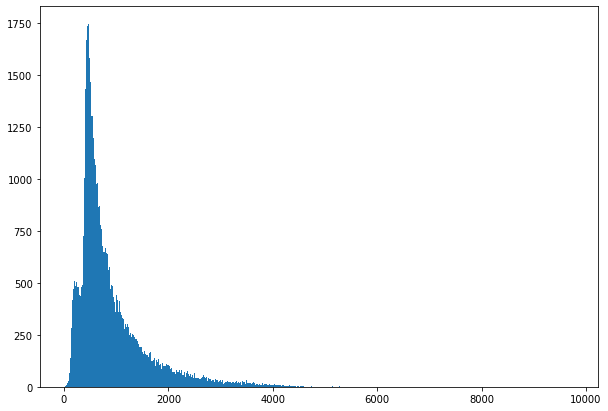

In [ ]:
df['length'] = 0

a = 0
for i, row in df.iterrows():
    l = len(row['review'])
    df.at[i,'length'] = l

length_array = df['length'].to_numpy()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(length_array, bins=500)
 
# Show plot
plt.show()

In [ ]:
df.head()

,review,sentiment,target,length
4320,film one boring film ever made. thing liked us...,negative,0,591
19407,got action fantasy mixed together want action ...,positive,1,189
14362,"1955 heist film follows tony le stephanois, re...",positive,1,938
5596,one film couple hour sunday morning -- able th...,negative,0,1100
14179,im big tim matheson fan admit liked film.it da...,positive,1,565


In [ ]:
df.to_csv('/content/drive/MyDrive/Soft Computing/Project/updated_dataset.csv')